# Three generations seeking romance - Regression & Classification

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)




In [234]:
df = pd.read_csv("data/profiles.csv", header=0)

In [235]:
df.columns = df.columns.str.strip()

In [236]:
df.sample(5)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
37809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [237]:
# Drop rows that all columns are empty
df = df.dropna(how='all')

In [238]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [239]:
df.sample(5)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
3063,27.0,fit,mostly anything,socially,never,graduated from law school,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"you are intelligent, down to earth, spontaneou...",NaN,70.0,-1.0,law / legal services,2012-06-29-21-54,"san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs,other but not too serious about it,m,leo and it&rsquo;s fun to think about,no,english,single
4043,40.0,fit,mostly anything,socially,NaN,graduated from college/university,i keep busy but try to relax as much as possib...,balancing work and play. you can help me tip t...,"i suppose whatever i set my mind on. however, ...",huh? what? i'm sorry?,"burgers and fries, mexican and italian sprinkl...",NaN,starting a hobby farm.,NaN,"i have chickens, fish and dogs... oh, and i'm ...","you like chickens, fish and dogs and the thoug...",white,74.0,-1.0,executive / management,2012-06-29-22-09,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,has dogs and likes cats,agnosticism and somewhat serious about it,m,virgo and it&rsquo;s fun to think about,no,english (fluently),single
239,19.0,average,NaN,socially,sometimes,working on high school,my name is ben and i'm a senior in high school...,hoping to go into a career in sports managemen...,"i'm pretty good at math, making people laugh, ...","people usually notice that i smile a lot, i'm ...",oh man i have a lot of favorites so i'll just ...,computer<br />\nfamily<br />\nfriends<br />\nc...,"school, college, and girls (plus food) makes u...","hanging out with friends, usually at a party o...",i'm a sucker for random displays of affection....,you like having a good time. like to laugh. an...,white,73.0,-1.0,student,2011-12-20-14-20,"san mateo, california",NaN,straight,has dogs and likes cats,judaism but not too serious about it,m,aquarius,no,"english (fluently), spanish (poorly), hebrew (...",single
2587,31.0,thin,mostly anything,socially,never,graduated from med school,im about as good at answering open-ended quest...,professionally i'm an internal medicine reside...,making sarcastic comments at inopportune times...,"i'm a smiler. it's not a conscious thing, i th...","los libros:<br />\ncat's cradle, love in the t...","family, mountains, friends, sun, laughter, games",an embarassing large percentage of any given d...,friday means more to people who regularly get ...,"i like shitty pop music, and at times i even e...","you like exploring--be it the town, the wilder...",hispanic / latin,67.0,-1.0,medicine / health,2012-06-26-23-28,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,agnosticism and laughing about it,f,gemini but it doesn&rsquo;t matter,no,"english, spanish (fluently)",single
4144,20.0,thin,anything,socially,sometimes,working on college/university,i luv life<br />\ni skateboard and work at a p...,"goin to skool, working and makin money<br />\n...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"hispanic / latin, white",70.0,-1.0,entertainment / media,2011-07-21-20-00,"san francisco, california",NaN,straight,NaN,christianity,m,NaN,when drinking,english,single


In [240]:
df.isnull().sum()

age               0
body_type       848
diet           3753
drinks          502
drugs          2299
education      1055
essay0          847
essay1         1167
essay2         1465
essay3         1824
essay4         1635
essay5         1700
essay6         2162
essay7         1961
essay8         3153
essay9         1960
ethnicity       949
height            0
income            0
job            1331
last_online       0
location          0
offspring      5628
orientation       0
pets           3162
religion       3253
sex               0
sign           1738
smokes          918
speaks            6
status            0
dtype: int64

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9514 entries, 0 to 9513
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          9514 non-null   float64
 1   body_type    8666 non-null   object 
 2   diet         5761 non-null   object 
 3   drinks       9012 non-null   object 
 4   drugs        7215 non-null   object 
 5   education    8459 non-null   object 
 6   essay0       8667 non-null   object 
 7   essay1       8347 non-null   object 
 8   essay2       8049 non-null   object 
 9   essay3       7690 non-null   object 
 10  essay4       7879 non-null   object 
 11  essay5       7814 non-null   object 
 12  essay6       7352 non-null   object 
 13  essay7       7553 non-null   object 
 14  essay8       6361 non-null   object 
 15  essay9       7554 non-null   object 
 16  ethnicity    8565 non-null   object 
 17  height       9514 non-null   float64
 18  income       9514 non-null   float64
 19  job        

In [242]:
df.describe()

,age,height,income
count,9514.000000,9514.000000,9514.000000
mean,32.084192,68.337398,18887.145155
std,9.445488,3.905229,91428.807808
min,18.000000,36.000000,-1.000000
25%,25.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,36.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


## Feature Engineering

In [243]:
# reindex values
df = df.reset_index()

In [244]:
df['body_type'].nunique()

12

In [245]:
df['body_type'].value_counts()

body_type
average           2274
fit               2040
athletic          1888
thin               740
curvy              626
a little extra     430
skinny             269
full figured       181
overweight          69
jacked              64
used up             47
rather not say      38
Name: count, dtype: int64

In [246]:
df['diet'].value_counts()

diet
mostly anything        2621
anything               1067
strictly anything       835
mostly vegetarian       568
mostly other            154
strictly vegetarian     135
vegetarian              111
strictly other           64
mostly vegan             52
other                    52
strictly vegan           40
vegan                    28
mostly halal             13
mostly kosher            12
strictly halal            4
strictly kosher           2
kosher                    2
halal                     1
Name: count, dtype: int64

In [247]:
essay_columns = ['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']
df = df.drop(columns=essay_columns)

In [248]:
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])


## I got the following Feature Engineering methods from kaggle

In [249]:
skinnystatus={"average":"fit",    
              "fit":"fit",
              "athletic":"fit",
              "thin":"fit",
              "curvy":"curvy",
              "a little extra":"curvy",
              "skinny":"fit",
              "full figured":"curvy",
              "overweight":"bad",
              "jacked":"bad",
              "used up":"bad",
              "rather not say":"curvy"
             }
df.body_type.replace(skinnystatus,inplace=True)       

In [250]:


df['diet'] = df['diet'].replace({
    'strictly anything': 'Anything',
    'mostly anything': 'Anything',
    'anything': 'Anything',
    'strictly vegan': 'Vegan',
    'mostly vegan': 'Vegan',
    'vegan': 'Vegan',
    'strictly vegetarian': 'Vegetarian',
    'mostly vegetarian': 'Vegetarian',
    'vegetarian': 'Vegetarian',
    'strictly other': 'Other',
    'mostly other': 'Other',
    'other': 'Other',
    'strictly halal': 'Halal',
    'mostly halal': 'Halal',
    'halal': 'Halal',
    'strictly kosher': 'Kosher',
    'mostly kosher': 'Kosher',
    'kosher': 'Kosher'
})

In [251]:


df['education'] = df['education'].replace({
    'working on college/university': 'Working on Education',
    'working on space camp': 'Working on Education',
    'graduated from masters program': 'Graduated',
    'graduated from college/university': 'Graduated',
    'working on two-year college': 'Working on Education',
    'graduated from high school': 'Graduated',
    'working on masters program': 'Working on Education',
    'graduated from space camp': 'Graduated',
    'college/university': 'Graduated',
    'dropped out of space camp': 'Dropped out of Education',
    'graduated from ph.d program': 'Graduated',
    'graduated from law school': 'Graduated',
    'working on ph.d program': 'Working on Education',
    'two-year college': 'Graduated',
    'graduated from two-year college': 'Graduated',
    'working on med school': 'Working on Education',
    'dropped out of college/university': 'Dropped out of Education',
    'space camp': 'Graduated',
    'graduated from med school': 'Graduated',
    'dropped out of high school': 'Dropped out of Education',
    'working on high school': 'Working on Education',
    'masters program': 'Graduated',
    'dropped out of ph.d program': 'Dropped out of Education',
    'dropped out of two-year college': 'Dropped out of Education',
    'dropped out of med school': 'Dropped out of Education',
    'high school': 'Graduated',
    'working on law school': 'Working on Education',
    'law school': 'Graduated',
    'dropped out of masters program': 'Dropped out of Education',
    'ph.d program': 'Graduated',
    'dropped out of law school': 'Dropped out of Education'
})



In [252]:


df['drinks'] = df['drinks'].replace({
    'socially': 'Moderate',
    'often': 'Frequent',
    'not at all': 'Never',
    'rarely': 'Rarely',
    'very often': 'Frequent',
    'desperately': 'Frequent'
})

In [253]:


df['job'] = df['job'].replace({ 
    'transportation': 'Other',
    'hospitality / travel': 'Other',
    'student': 'Other',
    'artistic / musical / writer': 'Artistic',
    'computer / hardware / software': 'Technology',
    'banking / financial / real estate': 'Finance',
    'entertainment / media': 'Media',
    'sales / marketing / biz dev': 'Sales',
    'other': 'Other',
    'medicine / health': 'Health',
    'science / tech / engineering': 'Science',
    'executive / management': 'Management',
    'education / academia': 'Education',
    'clerical / administrative': 'Administration',
    'construction / craftsmanship': 'Construction',
    'rather not say': 'Other',
    'political / government': 'Government',
    'law / legal services': 'Law',
    'unemployed': 'Other',
    'military': 'Other',
    'retired': 'Other'})



In [254]:
df['age']=df['age'].astype(int)

generation = []
for i in range(len(df)):
    if 17 < int(df["age"].iloc[i]) < 33:
        generation.append(1)
    elif 32 < int(df["age"].iloc[i]) < 48:
        generation.append(2)
    else:
        generation.append(3)
df["generation"] = generation

In [255]:
df['kid'] = df['offspring'].str.contains('has', na=False).astype(int)

In [256]:
df=df[['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'height', 'income', 'job',
       'sex', 'smokes', 'status', 'kid',"generation"]]


In [257]:
df.head()

,age,body_type,diet,drinks,drugs,education,height,income,job,sex,smokes,status,kid,generation
0,22,curvy,Anything,Moderate,never,Working on Education,75.0,-1.0,Other,m,sometimes,single,0,1
1,35,fit,Other,Frequent,sometimes,Working on Education,70.0,80000.0,Other,m,no,single,0,2
2,38,fit,Anything,Moderate,never,Graduated,68.0,-1.0,Other,m,no,available,0,2
3,23,fit,Vegetarian,Moderate,never,Working on Education,71.0,20000.0,Other,m,no,single,0,1
4,29,fit,Anything,Moderate,never,Graduated,66.0,-1.0,Artistic,m,no,single,0,1


In [258]:
df.loc[df['income'] == -1.0 , 'income'] = 0

In [259]:
df.sample(5)

,age,body_type,diet,drinks,drugs,education,height,income,job,sex,smokes,status,kid,generation
5550,33,fit,Anything,Moderate,never,Graduated,66.0,0.0,Finance,f,no,single,0,2
4959,24,fit,Anything,Moderate,never,Graduated,68.0,0.0,Artistic,m,sometimes,single,0,1
1211,45,fit,Other,Rarely,never,Graduated,66.0,20000.0,Other,m,no,single,0,2
2769,25,fit,Anything,Moderate,never,Working on Education,72.0,0.0,Other,m,no,single,0,1
100,38,fit,Anything,Moderate,never,Working on Education,71.0,0.0,Education,m,no,single,0,2


In [260]:
df['education'].value_counts()

education
Graduated                   7464
Working on Education        1727
Dropped out of Education     323
Name: count, dtype: int64

In [261]:
df['drinks'].value_counts()

drinks
Moderate    7181
Frequent     913
Rarely       911
Never        509
Name: count, dtype: int64

## Data Visualization

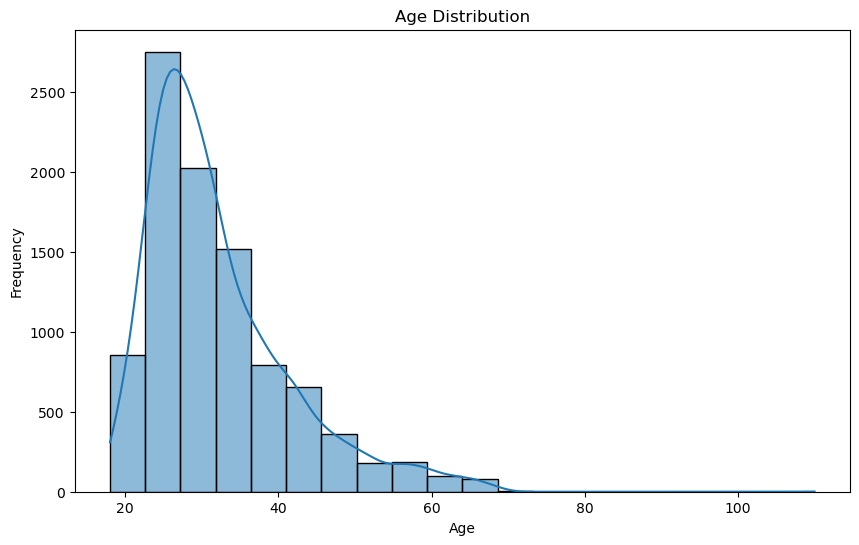

In [262]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


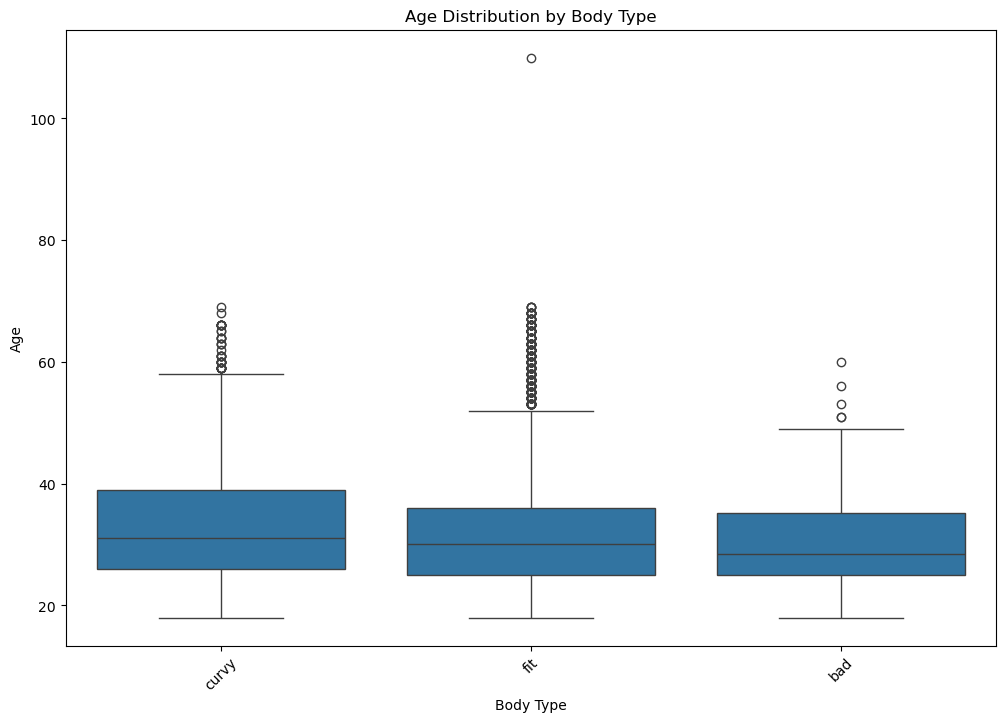

In [263]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='body_type', y='age', data=df)
plt.title('Age Distribution by Body Type')
plt.xlabel('Body Type')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()


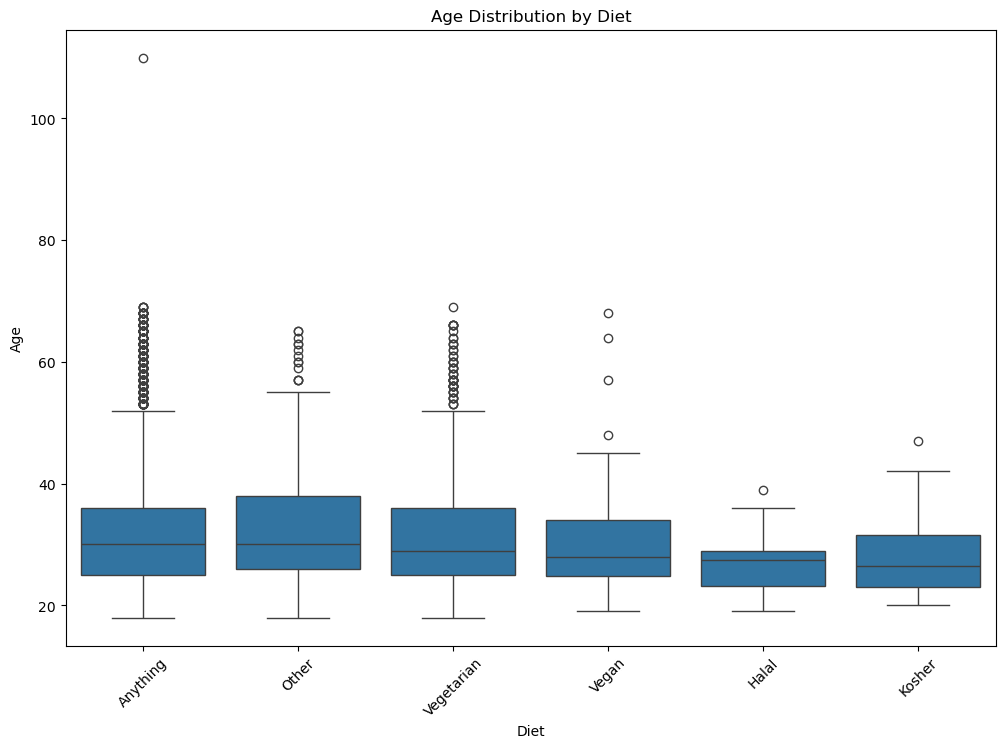

In [264]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='diet', y='age', data=df)
plt.title('Age Distribution by Diet')
plt.xlabel('Diet')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()


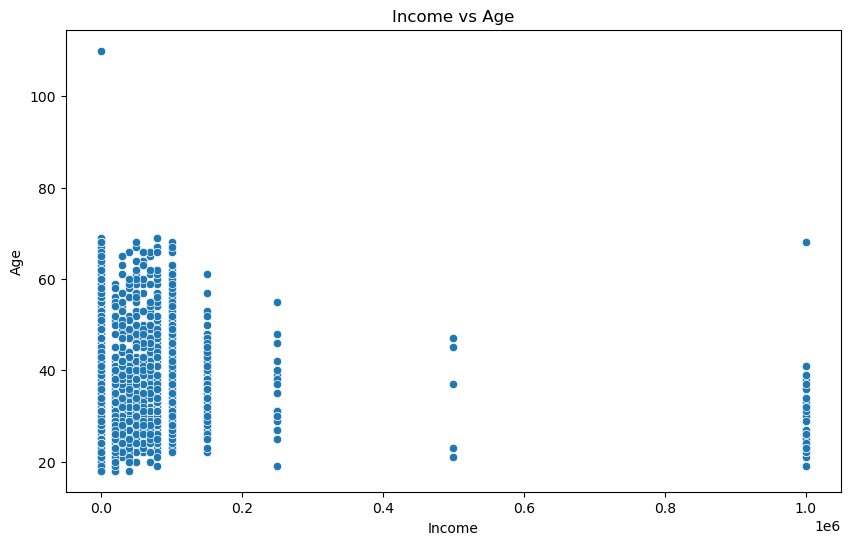

In [265]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='income', y='age', data=df)
plt.title('Income vs Age')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()


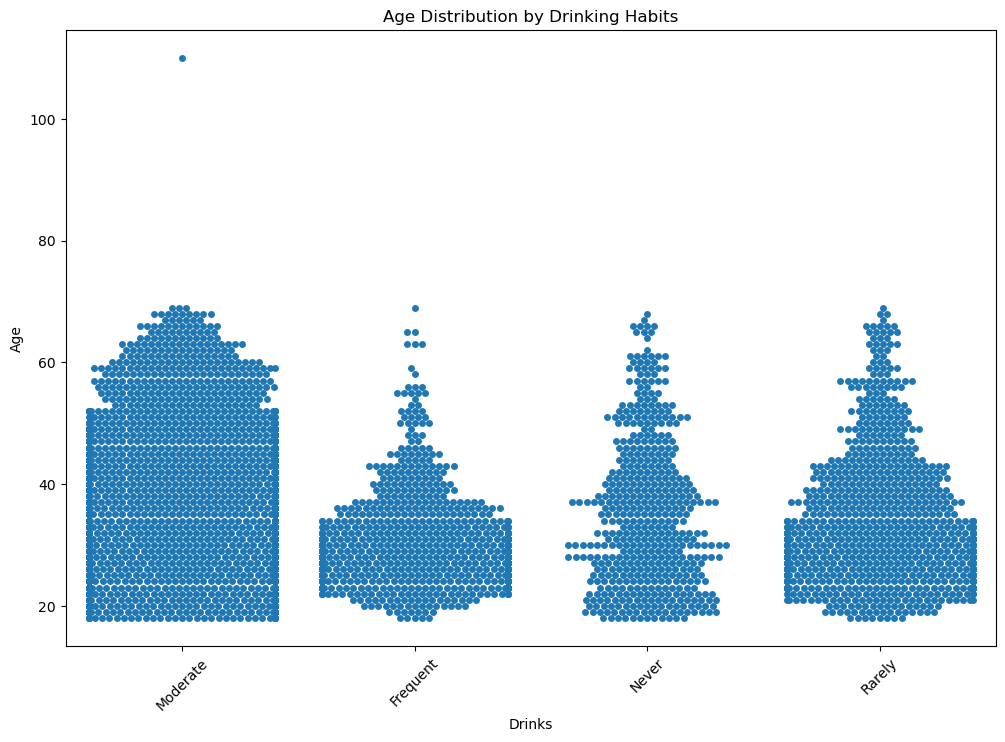

In [266]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x='drinks', y='age', data=df)
plt.title('Age Distribution by Drinking Habits')
plt.xlabel('Drinks')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

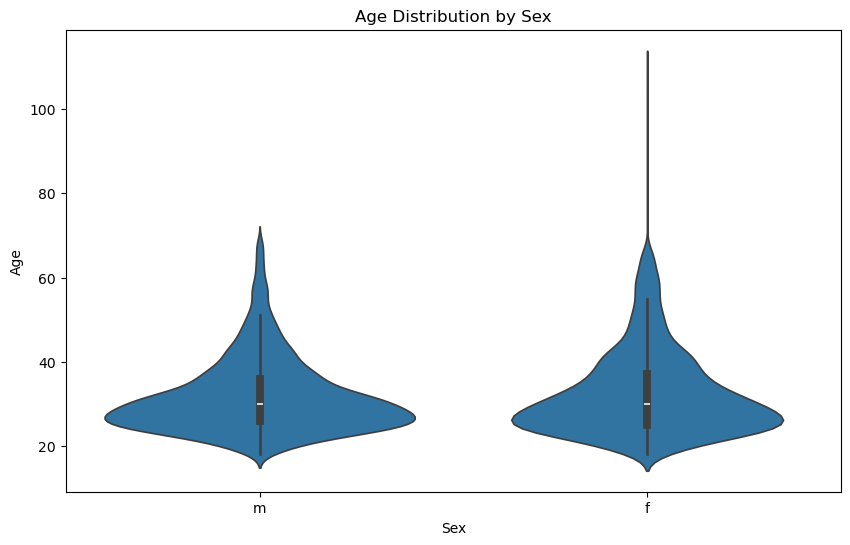

In [267]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='sex', y='age', data=df)
plt.title('Age Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9514 entries, 0 to 9513
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         9514 non-null   int64  
 1   body_type   9514 non-null   object 
 2   diet        9514 non-null   object 
 3   drinks      9514 non-null   object 
 4   drugs       9514 non-null   object 
 5   education   9514 non-null   object 
 6   height      9514 non-null   float64
 7   income      9514 non-null   float64
 8   job         9514 non-null   object 
 9   sex         9514 non-null   object 
 10  smokes      9514 non-null   object 
 11  status      9514 non-null   object 
 12  kid         9514 non-null   int64  
 13  generation  9514 non-null   int64  
dtypes: float64(2), int64(3), object(9)
memory usage: 1.0+ MB


In [282]:

x = df.drop('age', axis=1)
y = df[['age']]

In [283]:
x = pd.get_dummies(x, drop_first=True)

In [284]:
from sklearn.model_selection import train_test_split

In [285]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [286]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [298]:
model = Sequential()
model.add(Dense(256, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [299]:
history = model.fit(x_train, y_train, epochs=400, batch_size=64, validation_split=0.2)

Epoch 1/400
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1109660.3750 - mean_absolute_error: 232.1803 - val_loss: 495587.8750 - val_mean_absolute_error: 159.5504
Epoch 2/400
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - loss: 954406.5000 - mean_absolute_error: 168.9189 - val_loss: 31485.4922 - val_mean_absolute_error: 41.0109
Epoch 3/400
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - loss: 13059.4600 - mean_absolute_error: 28.0903 - val_loss: 432.3473 - val_mean_absolute_error: 8.9395
Epoch 4/400
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - loss: 658.8854 - mean_absolute_error: 10.9497 - val_loss: 196.4984 - val_mean_absolute_error: 9.3248
Epoch 5/400
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - loss: 6530.5967 - mean_absolute_error: 15.0020 - val_loss: 22738.6211 - val_mean_absolute_error: 41.5395
Epoch 6/400
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - loss: 49804.8516 - mean_absolute_error: 38.3702 - val_loss: 508.4659 - val_mean_absolute_error: 11.2570
Epoch 7/400
96/96 ━━━━━━━━━━━━━━━━━━━━ 0

In [300]:
pred = model.predict(x_test)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step


In [301]:
r2_score(y_test, pred)

0.662047722272592